In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# we import os library which will help us to create, delete, modify and edit our directory
import os 

# Q1) What is the best month for sale ?

In [2]:
all_cleaned_data = pd.read_csv(r'D:\Full Stack Data Science\Data Analytics Project\E-commerce Case Study(Sales data analysis)\data/all_cleaned_data.csv')
all_cleaned_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1.0,99.99,07/04/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1.0,600.00,12/04/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1.0,11.99,12/04/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [3]:
# Fetch month from the order date

'04/19/19 08:46'.split('/'), '04/19/19 08:46'.split('/')[0] 

(['04', '19', '19 08:46'], '04')

In [4]:
# Function to fetch month from the data frame
def month(x):
    return x.split('/')[0]

In [5]:
# Created new column 'month' and fill that data with the 'order date' value
all_cleaned_data['month'] = all_cleaned_data['Order Date'].apply(month)

all_cleaned_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,176559,Bose SoundSport Headphones,1.0,99.99,07/04/19 22:30,"682 Chestnut St, Boston, MA 02215",07
2,176560,Google Phone,1.0,600.00,12/04/19 14:38,"669 Spruce St, Los Angeles, CA 90001",12
3,176560,Wired Headphones,1.0,11.99,12/04/19 14:38,"669 Spruce St, Los Angeles, CA 90001",12
4,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


## • Similarly now we have to create a sales column, (sales = Quantity Order * Price Each)

In [6]:
# lets check the data type of data frame

all_cleaned_data.dtypes

Order ID              int64
Product              object
Quantity Ordered    float64
Price Each          float64
Order Date           object
Purchase Address     object
month                object
dtype: object

In [7]:
all_cleaned_data['month'] = all_cleaned_data['month'].astype(int)

In [8]:
all_cleaned_data.dtypes

Order ID              int64
Product              object
Quantity Ordered    float64
Price Each          float64
Order Date           object
Purchase Address     object
month                 int32
dtype: object

In [9]:
all_cleaned_data['Quantity Ordered'] = all_cleaned_data['Quantity Ordered'].astype(int)
all_cleaned_data.dtypes

Order ID              int64
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
month                 int32
dtype: object

In [10]:
# Now we have to add sales column

all_cleaned_data['sales'] = all_cleaned_data['Quantity Ordered'] * all_cleaned_data['Price Each']

all_cleaned_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,07/04/19 22:30,"682 Chestnut St, Boston, MA 02215",7,99.99
2,176560,Google Phone,1,600.00,12/04/19 14:38,"669 Spruce St, Los Angeles, CA 90001",12,600.00
3,176560,Wired Headphones,1,11.99,12/04/19 14:38,"669 Spruce St, Los Angeles, CA 90001",12,11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


### • Now back to our problem statement we have to find best month for the sales

In [11]:
all_cleaned_data.groupby('month')['sales'].sum()

# This is the sales for each and every month

month
1     2286906.13
2     2394466.93
3     2793085.44
4     3229765.34
5     3033275.77
6     2684602.52
7     2721872.59
8     2447041.57
9     2413750.82
10    3475536.75
11    3086325.27
12    3925406.84
Name: sales, dtype: float64

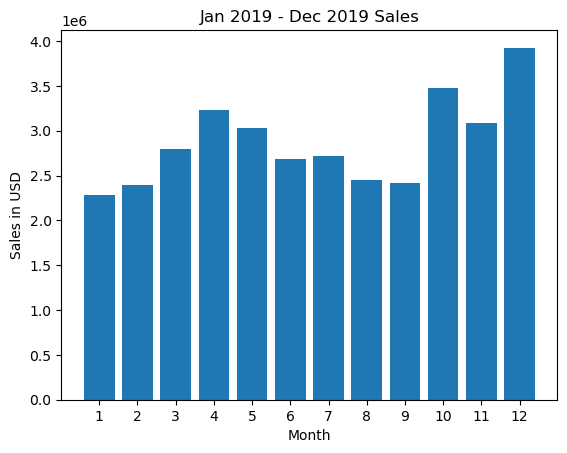

In [12]:
# Now plot above data

months = range(1,13)
plt.bar(months, all_cleaned_data.groupby('month')['sales'].sum())
plt.xticks(months)

plt.xlabel('Month')
plt.ylabel('Sales in USD')
plt.title('Jan 2019 - Dec 2019 Sales')

plt.savefig('D:\Full Stack Data Science\Data Analytics Project\E-commerce Case Study(Sales data analysis)\images/1_Best_month_for_sale.jpeg')

## • Conclusion:
    From this conclusion you can say that on 12th Month that is in December company has made maximum sales

# Q2) Which city has maximum order.

In [13]:
all_cleaned_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,07/04/19 22:30,"682 Chestnut St, Boston, MA 02215",7,99.99
2,176560,Google Phone,1,600.00,12/04/19 14:38,"669 Spruce St, Los Angeles, CA 90001",12,600.00
3,176560,Wired Headphones,1,11.99,12/04/19 14:38,"669 Spruce St, Los Angeles, CA 90001",12,11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [14]:
# As you can see that city name is in the 'Purchase Address' column
# So lets create a new colum name 'city'


'917 1st St, Dallas, TX 75001'.split(',')[1].lstrip()

'Dallas'

In [15]:
# Now lets create a function to extract the 'city name'

def city(x):
    return x.split(',')[1].lstrip()

In [16]:
# Now apply the above function to data frame and create a new column

all_cleaned_data['city'] = all_cleaned_data['Purchase Address'].apply(city)

# Check the data

all_cleaned_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
1,176559,Bose SoundSport Headphones,1,99.99,07/04/19 22:30,"682 Chestnut St, Boston, MA 02215",7,99.99,Boston
2,176560,Google Phone,1,600.00,12/04/19 14:38,"669 Spruce St, Los Angeles, CA 90001",12,600.00,Los Angeles
3,176560,Wired Headphones,1,11.99,12/04/19 14:38,"669 Spruce St, Los Angeles, CA 90001",12,11.99,Los Angeles
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


### • Back to our problem statement which city has maximum order

In [17]:
# group 'all_cleaned_data' of 'city' with respect to every 'city' and count the total.

count_city = all_cleaned_data.groupby('city')['city'].count()
count_city

city
Atlanta          14881
Austin            9905
Boston           19934
Dallas           14820
Los Angeles      29605
New York City    24876
Portland         12465
San Francisco    44732
Seattle          14732
Name: city, dtype: int64

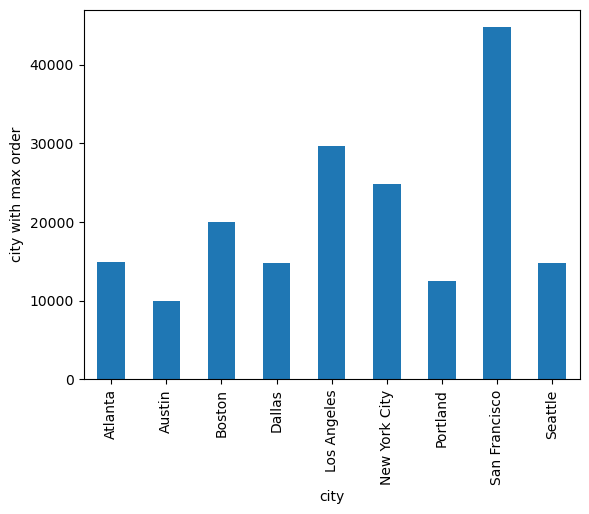

In [18]:
count_city.plot.bar()

plt.xlabel('city')
plt.ylabel('city with max order')

plt.savefig('D:\Full Stack Data Science\Data Analytics Project\E-commerce Case Study(Sales data analysis)\images/2_city_has_max_order.jpeg')

### • Conclusion:
    As you can see the maximum order on this E-commerce website is from 'San Francisco'

# Q3) At what time sales of product purchase is maximum.

In [19]:
all_cleaned_data.dtypes

Order ID              int64
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
month                 int32
sales               float64
city                 object
dtype: object

In [20]:
# As you can see 'Order Date' column is in the object format so we have to conver it into 'date-time' format

all_cleaned_data['Time(hr)'] = pd.to_datetime(all_cleaned_data['Order Date']).dt.hour

all_cleaned_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,Time(hr)
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8
1,176559,Bose SoundSport Headphones,1,99.99,07/04/19 22:30,"682 Chestnut St, Boston, MA 02215",7,99.99,Boston,22
2,176560,Google Phone,1,600.00,12/04/19 14:38,"669 Spruce St, Los Angeles, CA 90001",12,600.00,Los Angeles,14
3,176560,Wired Headphones,1,11.99,12/04/19 14:38,"669 Spruce St, Los Angeles, CA 90001",12,11.99,Los Angeles,14
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9


In [21]:
keys = []
hour = []

# Iterate over a group by of 'Time(hr)'
# This will give us key and entire dataframe
for key, hour_df in all_cleaned_data.groupby('Time(hr)'):
    keys.append(key)
    hour.append(len(hour_df))

In [22]:
# to see all the keys 
keys

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

In [23]:
hour

[3910,
 2350,
 1243,
 831,
 854,
 1321,
 2482,
 4011,
 6256,
 8748,
 10944,
 12411,
 12587,
 12129,
 10984,
 10175,
 10384,
 10899,
 12280,
 12905,
 12228,
 10921,
 8822,
 6275]

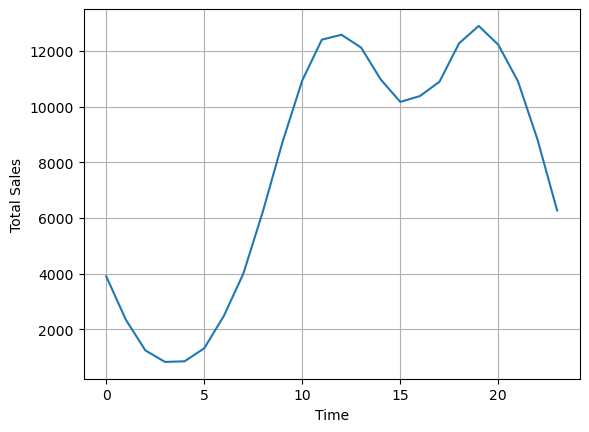

In [24]:
# Now plot above data

plt.grid()
plt.plot(keys, hour)

plt.xlabel('Time')
plt.ylabel('Total Sales')

plt.savefig('D:\Full Stack Data Science\Data Analytics Project\E-commerce Case Study(Sales data analysis)\images/3_Time_product_purchaseMax.jpeg')

## • Conclude:
    As you can see the graph says that the maximum order is in the between 12pm and 7pm
    so one can advvertise the order in such interval so i have a 

# Q4) What Product sold the most and why.

In [25]:
all_cleaned_data.groupby('Product')['Quantity Ordered'].sum()

# This data gives me total sell of each product

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int32

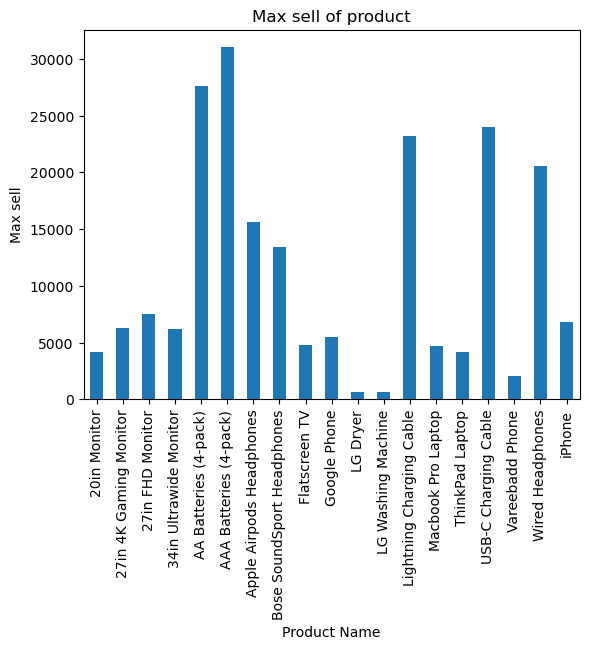

In [26]:
# Save data into variable
product_sell = all_cleaned_data.groupby('Product')['Quantity Ordered'].sum()

# plot above variable
product_sell.plot(kind = 'bar')
plt.xlabel('Product Name')
plt.ylabel('Max sell')

plt.title('Max sell of product')

plt.savefig('D:\Full Stack Data Science\Data Analytics Project\E-commerce Case Study(Sales data analysis)\images/4_most_sold_product.jpeg')

## • Conclusion:
    From this graph you can conclude that the maximum sell of the product of this e-commerece website is 
    'AAA Batteries(4-pack)'. Which has Total selling of 30 Thousand

In [27]:
all_cleaned_data.groupby('Product')['Price Each'].mean()

# This will give us mean price of all the product

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

## • conclusion:
    As you can see 'AAA Batteries' have the least mean price so this can be the reason that this product has the 
    highest sell.

In [28]:
# This is my data structure

product_sell = all_cleaned_data.groupby('Product')['Quantity Ordered'].sum().index
quantity = all_cleaned_data.groupby('Product')['Quantity Ordered'].sum()
prices = all_cleaned_data.groupby('Product')['Price Each'].mean()

C:\Users\jawal\AppData\Local\Temp\ipykernel_10468\2119295393.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(product_sell, rotation = 'vertical', size = 8)


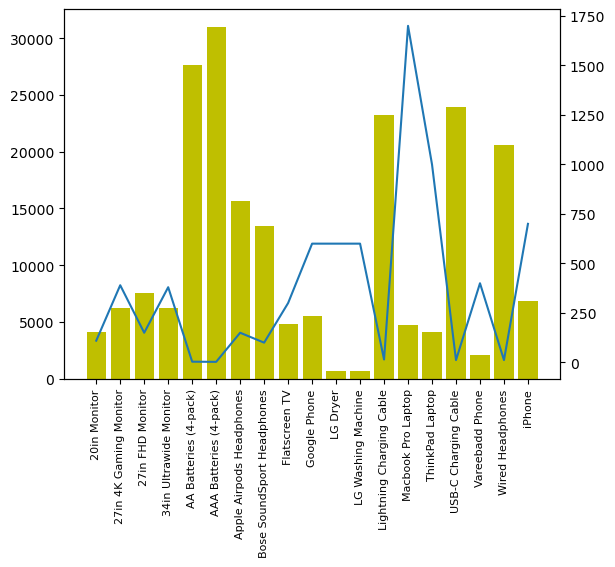

In [29]:
# Now lets plot the data set:

fig, ax1 = plt.subplots()    #......this will give me bydefault(1 rows, 1 column)figure by default
ax2 = ax1.twinx()

ax1.bar(product_sell, quantity, color = 'y')
ax2.plot(product_sell, prices)

ax1.set_xticklabels(product_sell, rotation = 'vertical', size = 8)

plt.savefig('D:\Full Stack Data Science\Data Analytics Project\E-commerce Case Study(Sales data analysis)\images/4.correlation_maxsold_product.jpeg')

## • Conclusion
    'AAA Batteries' are the top selling products. So you can see the top selling product has a correlation with the price        of the product so it means the cheaper the product the higher the quantity order. vise versa

# Q5) What Products are most often sold together 


To find solution we have to group those order Id which are similar, Same order ID means these products are sold together

In [30]:
all_cleaned_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,Time(hr)
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8
1,176559,Bose SoundSport Headphones,1,99.99,07/04/19 22:30,"682 Chestnut St, Boston, MA 02215",7,99.99,Boston,22
2,176560,Google Phone,1,600.00,12/04/19 14:38,"669 Spruce St, Los Angeles, CA 90001",12,600.00,Los Angeles,14
3,176560,Wired Headphones,1,11.99,12/04/19 14:38,"669 Spruce St, Los Angeles, CA 90001",12,11.99,Los Angeles,14
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9


In [31]:
# We have to keep duplicated data together
df = all_cleaned_data['Order ID'].duplicated(keep = False)   #.....This is filter operation
df2 = all_cleaned_data[df]    #......Apply this filter operation
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,Time(hr)
2,176560,Google Phone,1,600.00,12/04/19 14:38,"669 Spruce St, Los Angeles, CA 90001",12,600.00,Los Angeles,14
3,176560,Wired Headphones,1,11.99,12/04/19 14:38,"669 Spruce St, Los Angeles, CA 90001",12,11.99,Los Angeles,14
17,176574,Google Phone,1,600.00,03/04/19 19:42,"20 Hill St, Los Angeles, CA 90001",3,600.00,Los Angeles,19
18,176574,USB-C Charging Cable,1,11.95,03/04/19 19:42,"20 Hill St, Los Angeles, CA 90001",3,11.95,Los Angeles,19
29,176585,Bose SoundSport Headphones,1,99.99,07/04/19 11:31,"823 Highland St, Boston, MA 02215",7,99.99,Boston,11


In [32]:
# As you can see 'Order ID' is similar, Now we have to call groupby() operation on this 'Order ID'

df2['Grouped'] = df2.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))

# Here we did join operation on 'Order ID' and fetch 'Product' column


df2.head()

C:\Users\jawal\AppData\Local\Temp\ipykernel_10468\3329552850.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Grouped'] = df2.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,Time(hr),Grouped
2,176560,Google Phone,1,600.00,12/04/19 14:38,"669 Spruce St, Los Angeles, CA 90001",12,600.00,Los Angeles,14,"Google Phone,Wired Headphones"
3,176560,Wired Headphones,1,11.99,12/04/19 14:38,"669 Spruce St, Los Angeles, CA 90001",12,11.99,Los Angeles,14,"Google Phone,Wired Headphones"
17,176574,Google Phone,1,600.00,03/04/19 19:42,"20 Hill St, Los Angeles, CA 90001",3,600.00,Los Angeles,19,"Google Phone,USB-C Charging Cable"
18,176574,USB-C Charging Cable,1,11.95,03/04/19 19:42,"20 Hill St, Los Angeles, CA 90001",3,11.95,Los Angeles,19,"Google Phone,USB-C Charging Cable"
29,176585,Bose SoundSport Headphones,1,99.99,07/04/19 11:31,"823 Highland St, Boston, MA 02215",7,99.99,Boston,11,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [33]:
df2 = df2.drop_duplicates(subset = ['Order ID'])
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,Time(hr),Grouped
2,176560,Google Phone,1,600.00,12/04/19 14:38,"669 Spruce St, Los Angeles, CA 90001",12,600.00,Los Angeles,14,"Google Phone,Wired Headphones"
17,176574,Google Phone,1,600.00,03/04/19 19:42,"20 Hill St, Los Angeles, CA 90001",3,600.00,Los Angeles,19,"Google Phone,USB-C Charging Cable"
29,176585,Bose SoundSport Headphones,1,99.99,07/04/19 11:31,"823 Highland St, Boston, MA 02215",7,99.99,Boston,11,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,AAA Batteries (4-pack),2,2.99,10/04/19 17:00,"365 Center St, San Francisco, CA 94016",10,5.98,San Francisco,17,"AAA Batteries (4-pack),Google Phone"
118,176672,Lightning Charging Cable,1,14.95,12/04/19 11:07,"778 Maple St, New York City, NY 10001",12,14.95,New York City,11,"Lightning Charging Cable,USB-C Charging Cable"


In [34]:
# This will give me count of each of the grouped columns
Product_sold_together = df2['Grouped'].value_counts()[0:5]
Product_sold_together

iPhone,Lightning Charging Cable         882
Google Phone,USB-C Charging Cable       856
iPhone,Wired Headphones                 361
Vareebadd Phone,USB-C Charging Cable    312
Google Phone,Wired Headphones           303
Name: Grouped, dtype: int64

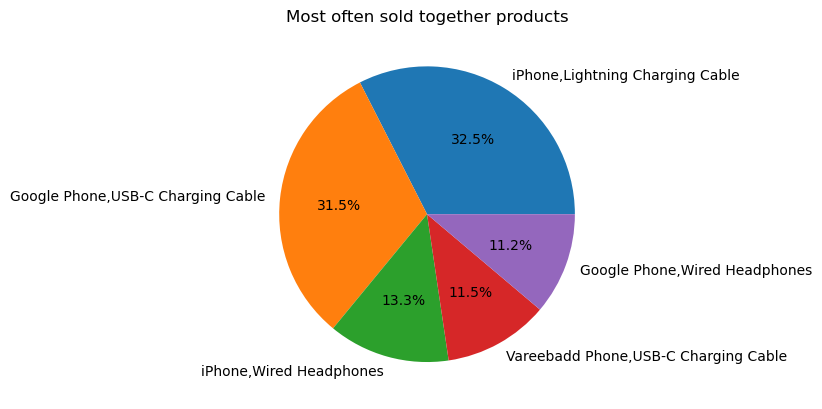

In [35]:
# Plot above data

Product_sold_together.plot.pie(label='',autopct = '%1.1f%%')
plt.title('Most often sold together products')
plt.savefig('D:\Full Stack Data Science\Data Analytics Project\E-commerce Case Study(Sales data analysis)\images/5_Product_mostoften_soldTogether.jpeg',bbox_inches = 'tight', dpi = 300)
plt.show()

## • Conclusion:
    As you can see here maximum area is covered by 'Google Phone','USB-C Charging Cable';'iPhone',
    'Lightning Charging Cable'. Which means these Products are more often sold together